# Packages

### import some packages used in outlier fixing part

In [2]:
#Basic scientific python libs
import pandas as pd
import numpy as np

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

# import package for Linear regression
from scipy.stats import linregress 
#import seaborn as sns
# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
#Notebook displace setting
from IPython.core.display import HTML
css = open('style/style-table.css').read() + open('style/style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

### Fixing the outliers

In [3]:
# Read the data file.
outlier = pd.read_csv('Group006_outlier_data.csv')

In [4]:
# we divide the 2 kind of customers with loyalty and without loyalty.
hasLoyalty = outlier[outlier['customerHasloyalty?'] == 1] #customer with Loyalty
noLoyalty = outlier[outlier['customerHasloyalty?'] == 0] #customer without Loyalty

## We want to keep the digit the of the distance for the customer, than groupby the distance to draw the boxplot, finding the outliers

In [155]:
# Add a new column for the distance int for customer with loyalty
# This function is used to keep only the digit part of all customer's distance.
def distance_round(distance):
     return round(distance)

# Add a new column named 'distanceInt' to each row of customer with loyalty
HasLoyalty = hasLoyalty # copy then insert new column
HasLoyalty['distanceInt'] = hasLoyalty['distance_to_customer_KM'].apply(distance_round)
HasLoyalty.head()

C:\Users\73745\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,distanceInt
40,ORDZ03252,2018-01-12,08:20:16,Breakfast,NS,"[('Pancake', 5), ('Eggs', 1)]",143.25,-37.819196,144.987556,1,9.158,7.460776,9
58,ORDZ03419,2018-01-15,08:20:16,Breakfast,NS,"[('Coffee', 10), ('Pancake', 10), ('Eggs', 4)]",405.50,-37.815102,144.923050,1,11.071,7.697312,11
93,ORDJ05349,2018-01-14,08:20:16,Breakfast,TP,"[('Eggs', 10), ('Coffee', 6), ('Pancake', 10),...",528.50,-37.808563,145.000167,1,11.246,7.508883,11
132,ORDC10650,2018-01-09,08:10:08,Breakfast,NS,"[('Eggs', 9), ('Pancake', 3)]",270.75,-37.810906,144.967156,1,7.423,6.085523,7
140,ORDC05117,2018-01-17,08:30:25,Breakfast,NS,"[('Pancake', 10), ('Cereal', 3)]",305.50,-37.806472,144.932516,1,10.161,7.263606,10


In [153]:
# Add a new column named 'distanceInt' to each row of customer with loyalty
NoLoyalty = noLoyalty # copy then insert new column
NoLoyalty['distanceInt'] = noLoyalty['distance_to_customer_KM'].apply(distance_round)
NoLoyalty.head()

C:\Users\73745\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,distanceInt
0,ORDC10901,2018-03-05,10:01:41,Breakfast,NS,"[('Pancake', 9), ('Coffee', 2)]",233.25,-37.804963,144.973533,0,6.746,11.460292,7
1,ORDA09244,2018-10-13,17:27:53,Dinner,BK,"[('Pasta', 9), ('Fish&Chips', 8), ('Shrimp', 1...",745.50,-37.821130,144.957737,0,8.430,8.944400,8
2,ORDJ03342,2018-08-18,15:36:20,Lunch,TP,"[('Steak', 7), ('Salad', 3), ('Fries', 6), ('C...",534.60,-37.810478,145.003277,0,11.341,7.845259,11
3,ORDK00688,2018-06-17,13:34:38,Lunch,BK,"[('Chicken', 6), ('Burger', 5), ('Fries', 10),...",733.00,-37.815779,144.946163,0,9.170,18.213758,9
4,ORDK10487,2018-03-08,10:11:49,Breakfast,BK,"[('Cereal', 3), ('Eggs', 9)]",261.00,-37.818783,144.983814,0,6.377,11.155435,6


## Draw boxplots to find the outliers

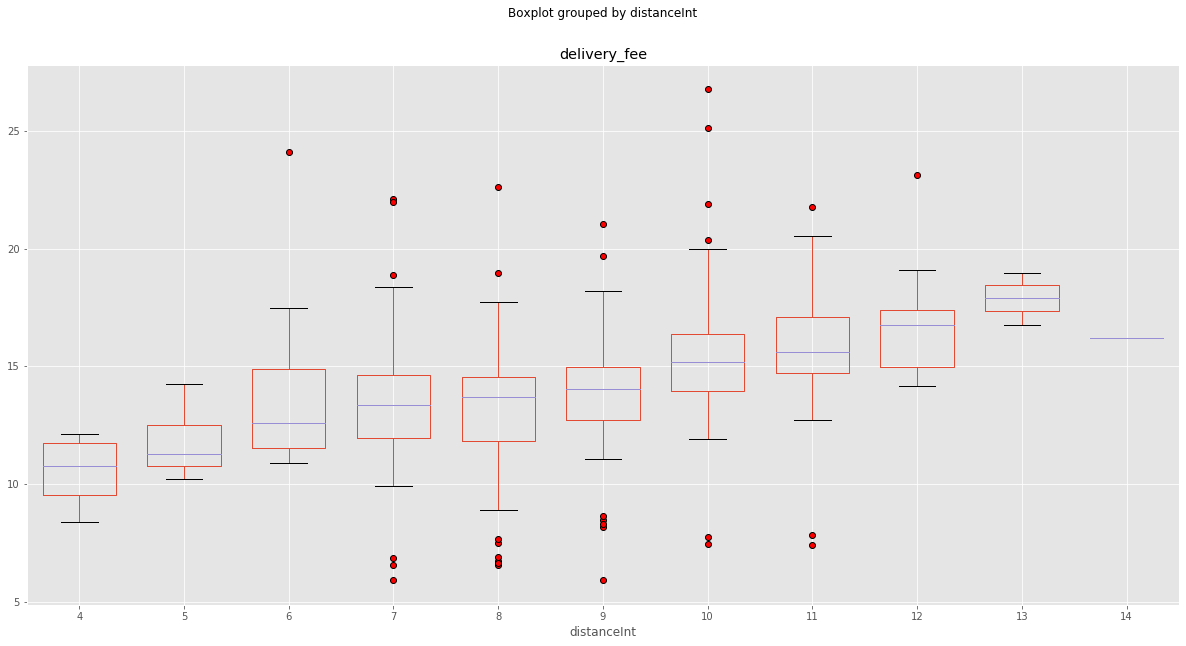

In [154]:
# Draw the boxplot to see if there is outlier in the customer without loyalty.
bp = NoLoyalty.boxplot(column='delivery_fee', by = 'distanceInt',widths=0.7,boxprops = {'color':'black'},flierprops = {'marker':'o','markerfacecolor':'red','color':'black'},figsize=(20,10))

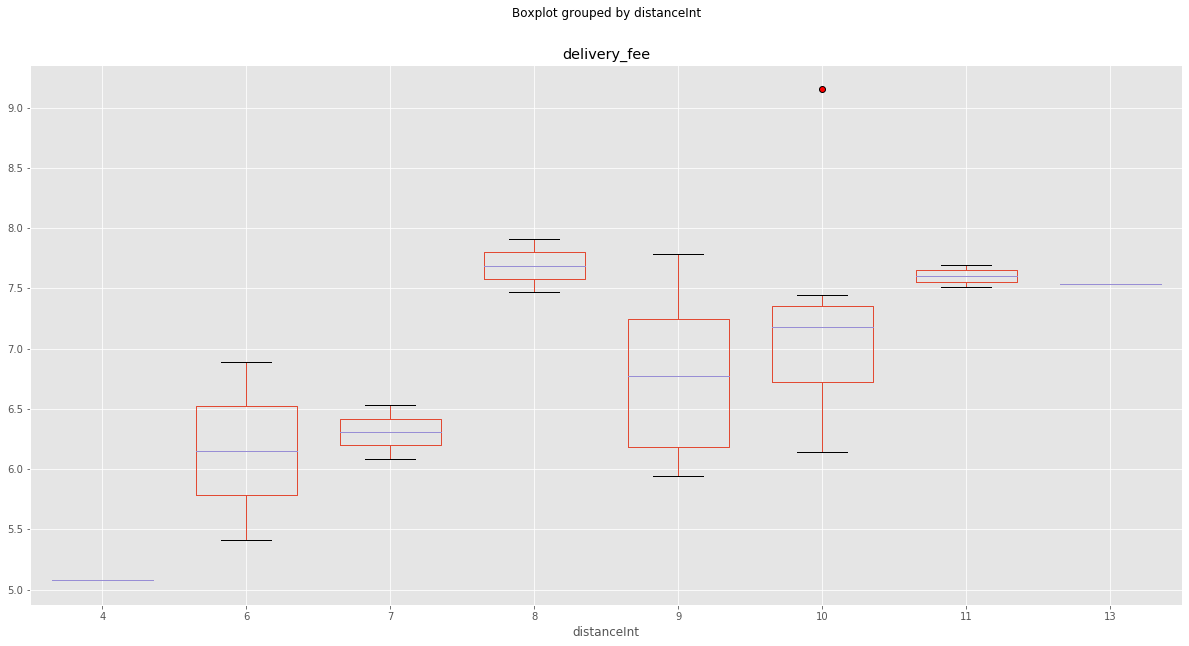

In [156]:
# Draw the boxplot for the user who has loyalty to see if there is outlier.
bp2 = HasLoyalty.boxplot(column='delivery_fee', by = 'distanceInt',widths=0.7,boxprops = {'color':'black'},flierprops = {'marker':'o','markerfacecolor':'red','color':'black'},figsize=(20,10))

### write functions to get the outlier values
As the defination, outliers are data which is bigger than `top_board` or less than `lower_board`
So we difined 2 functions to `using defination to calculate` the top_board and lower_board value

In [160]:
# 2 functions used for noloyalty data


def get_top(distance):
    QL = NoLoyalty['delivery_fee'][NoLoyalty['distanceInt'] == distance].describe()['25%']
    QU = NoLoyalty['delivery_fee'][NoLoyalty['distanceInt'] == distance].describe()['75%']
    IQR = QU - QL
    top = QU + 1.5 * IQR
    return top

def get_low(distance):
    QL = NoLoyalty['delivery_fee'][NoLoyalty['distanceInt'] == distance].describe()['25%']
    QU = NoLoyalty['delivery_fee'][NoLoyalty['distanceInt'] == distance].describe()['75%']
    IQR = QU - QL
    low = QL - 1.5 * IQR
    return low

#2 functions with hasloyalty data

def get_top_loyalty(distance):
    QL = HasLoyalty['delivery_fee'][HasLoyalty['distanceInt'] == distance].describe()['25%']
    QU = HasLoyalty['delivery_fee'][HasLoyalty['distanceInt'] == distance].describe()['75%']
    IQR = QU - QL
    top = QU + 1.5 * IQR
    return top

def get_low_loyalty(distance):
    QL = HasLoyalty['delivery_fee'][HasLoyalty['distanceInt'] == distance].describe()['25%']
    QU = HasLoyalty['delivery_fee'][HasLoyalty['distanceInt'] == distance].describe()['75%']
    IQR = QU - QL
    low = QL - 1.5 * IQR
    return low

### delete the outlier lines in the outlier dataframe
Using the functions to `compare` each value with the `top_board` and `lower_board`, then append those `index` to a list, then use a for loop to `remove the rows in original table` with the index in this list

In [166]:
# delete outlier rows of customer
distance_list = []
for i in temp_2['distanceInt']:
    if i not in distance_list:
        distance_list.append(i)
distance_list = sorted(distance_list)

# create a list to store the index so that to delete from the outlier table
index_list = []
for j in distance_list:
    # append outliers without loyalty
    index_out = NoLoyalty[((temp_2['delivery_fee'] > get_top(j)) | (NoLoyalty['delivery_fee'] < get_low(j))) & (NoLoyalty['distanceInt'] == j)].index
    index_list.append(index_out)
    # append outliers with loyalty
    index_out = HasLoyalty[((HasLoyalty['delivery_fee'] > get_top_loyalty(j)) | (HasLoyalty['delivery_fee'] < get_low_loyalty(j))) & (HasLoyalty['distanceInt'] == j)].index
    index_list.append(index_out)
    
result = outlier.copy()
for index_drop in index_list:
    result = result.drop(index=index_drop)
    print("delete row" + str(index_drop))

delete rowInt64Index([], dtype='int64')
delete rowInt64Index([], dtype='int64')
delete rowInt64Index([], dtype='int64')
delete rowInt64Index([], dtype='int64')
delete rowInt64Index([320], dtype='int64')
delete rowInt64Index([], dtype='int64')
delete rowInt64Index([60, 227, 310, 325, 414, 464], dtype='int64')
delete rowInt64Index([], dtype='int64')
delete rowInt64Index([44, 72, 77, 85, 262, 330, 347, 493], dtype='int64')
delete rowInt64Index([], dtype='int64')
delete rowInt64Index([5, 21, 117, 138, 203, 206, 218], dtype='int64')
delete rowInt64Index([], dtype='int64')
delete rowInt64Index([63, 127, 166, 211, 264, 357], dtype='int64')
delete rowInt64Index([353], dtype='int64')
delete rowInt64Index([2, 428, 450], dtype='int64')
delete rowInt64Index([], dtype='int64')
delete rowInt64Index([495], dtype='int64')
delete rowInt64Index([], dtype='int64')
delete rowInt64Index([], dtype='int64')
delete rowInt64Index([], dtype='int64')
delete rowInt64Index([], dtype='int64')
delete rowInt64Index([

### Check the result and output the .csv file

In [171]:
result.describe()
# From the result we can see the count change from 500 to 467, we have deleted 33 rows of outlier.

,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
count,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,495.801392,-37.812863,144.967166,0.049251,8.805642,13.874955
std,268.788655,0.007801,0.021560,0.216623,1.662672,2.520914
min,44.000000,-37.833683,144.917839,0.000000,3.536000,5.077931
25%,292.750000,-37.819349,144.952016,0.000000,7.844500,12.603606
50%,432.500000,-37.813149,144.964657,0.000000,8.842000,14.118024
75%,667.400000,-37.806216,144.982783,0.000000,9.830500,15.398022
max,1300.000000,-37.788265,145.016065,1.000000,13.688000,20.533610


## Then we will do the output part, using `to_csv` function, following the format to output csv file.

In [169]:
result.to_csv("Group006_outlier_data_solution.csv")